In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
# Leer archivo de datos
# Convertir las columnas Temp, de objeto a número
df = pd.read_csv("sargento-2702181.csv", header=None,skiprows=2, names=['#','DateTime','AbsPres','Temp','WaterLevel'])
#df.DateTime=pd.to_numeric(df.DateTime, errors='coerce')
df.AbsPres=pd.to_numeric(df.AbsPres, errors='coerce')
df.head()

,#,DateTime,AbsPres,Temp,WaterLevel
0,1,02/04/2018 09:45:00,108.068,17.094,0.060
1,2,02/04/2018 10:00:00,107.815,16.903,0.035
2,3,02/04/2018 10:15:00,107.791,16.903,0.032
3,4,02/04/2018 10:30:00,107.791,16.903,0.032
4,5,02/04/2018 10:45:00,107.791,16.903,0.032


In [3]:
# Leer archivo de datos
# Convertir las columnas Temp, de objeto a número
df1 = pd.read_csv("sargento-salinidad-2702181.csv", header=None,skiprows=2, names=['#','DateTime','CordonHigh','Temp','SpecificConductance','Salinity'])
#df.DateTime=pd.to_numeric(df1.DateTime, errors='coerce')
#df1.CondHigh=pd.to_numeric(df1.CondHigh, errors='coerce')
df1.head()

,#,DateTime,CordonHigh,Temp,SpecificConductance,Salinity
0,1,02/04/2018 09:30:00,50782.6,17.53,59295.4,39.6728
1,2,02/04/2018 09:45:00,50617.2,17.33,59362.4,39.7235
2,3,02/04/2018 10:00:00,50646.3,17.23,59526.8,39.8482
3,4,02/04/2018 10:15:00,50772.9,17.17,59753.7,40.0203
4,5,02/04/2018 10:30:00,51007.8,17.14,60068.6,40.2595


In [4]:
# Convertir la cadena de caracteres 'Date' en variable temporal 'NDate'
df['Ndate'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S')
df['month'] = df['Ndate'].dt.month
df.head()

,#,DateTime,AbsPres,Temp,WaterLevel,Ndate,month
0,1,02/04/2018 09:45:00,108.068,17.094,0.060,2018-02-04 09:45:00,2
1,2,02/04/2018 10:00:00,107.815,16.903,0.035,2018-02-04 10:00:00,2
2,3,02/04/2018 10:15:00,107.791,16.903,0.032,2018-02-04 10:15:00,2
3,4,02/04/2018 10:30:00,107.791,16.903,0.032,2018-02-04 10:30:00,2
4,5,02/04/2018 10:45:00,107.791,16.903,0.032,2018-02-04 10:45:00,2


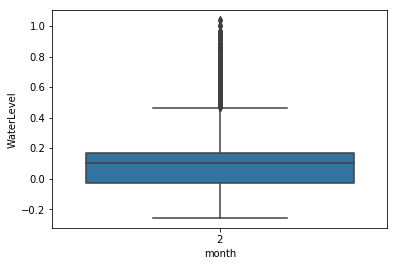

In [5]:
# graficar Boxplots por mes
# Biblioteca Seaborn
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.boxplot(x="month", y="WaterLevel", data=df)
plt.show()

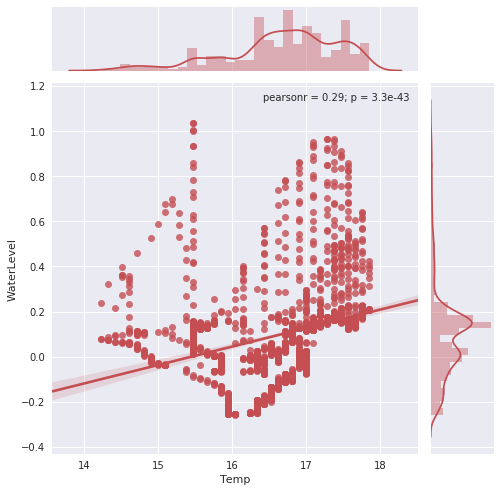

In [6]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Temp", "WaterLevel", data=df, kind="reg",
                   color="r", size=7)
plt.show(g)

In [7]:
df3 = pd.concat([df['WaterLevel'], df1['Salinity']],axis=1)
df3.head()

,WaterLevel,Salinity
0,0.060,39.6728
1,0.035,39.7235
2,0.032,39.8482
3,0.032,40.0203
4,0.032,40.2595


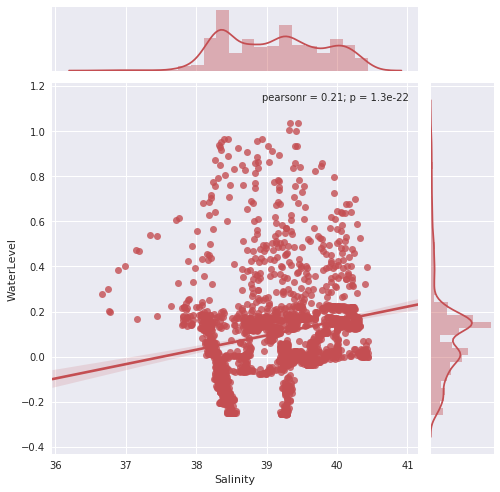

In [8]:
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

g = sns.jointplot("Salinity", "WaterLevel", data=df3, kind="reg",
                   color="r", size=7)
plt.show(g)